# 1. Introduction

# 2. Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister

- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...

- Parent = mother, father

- Child = daughter, son, stepdaughter, stepson

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Bởi vì PassengerID cũng tương tự như các số index và nó ko có ý nghĩa to lớn trong bài phân tích nên biến nó thành số index luôn

In [6]:
train.set_index(train.PassengerId, inplace=True)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Sau khi chuyển đổi PassengerID thành cột index thì sẽ dư 1 cột nên drop nó

In [8]:
train.drop('PassengerId', axis=1, inplace=True)

In [9]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Phương pháp 2: chuyển đổi cột index

In [10]:
test = pd.read_csv('test.csv', index_col = 'PassengerId')

In [11]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Xác định Categorical và Numerical
##### Cateforical: `nominal (sex,..)`, `ordinal (Pclass,..)`, `ratio`, `interval`
##### Numerical: `discrete`, `continuous`, `timeseries`

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


23:34 : explain why we have to change data type

##### Survived, Pclass, Sex, SibSp, Parch, Embarked - đây là những cột phải đổi sang 'categorical'
- Survived: có 0 hoặc 1 thể hiện cho ngừoi sống sót và mất mạng (nominal)
- Sex: có nam hoặc nữ (nominal)
- Pclass: theo thứ tự 1,2,3 (ordinal)
- Embarked: chỉ có 3 sự lựa chọn: 3 cảng xuất phát
- SibSp: 1,2,3 anh chị em, ko đến 100 anh chị em nên thuộc dạng phân loại
##### Numerical(continuous): `age`, `fare` (giá vé rời rạc - discrete)
##### mix type of data: `cabin`, `ticket`
##### contain error / typo: `name`
##### contain blank or null data: `cabin` - `age` - `Embarked`
##### various data type: string, int, float

In [14]:
train['Survived'] = train['Survived'].astype('category')

In [15]:
#check again
train['Survived'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

#### Phương pháp 2: tạo vòng lặp chuyển đổi định dạng dữ liệu

In [16]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cate(df, features): #convert_cate là tên tự đặt
    for i in features:
        df[i] = df[i].astype('category') #28:26 giải thích cách gọi cột
convert_cate(train, features)
convert_cate(test, features)

In [17]:
train.info(), test.info();

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age   

## Distribution of Numerical feature

In [18]:
train.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


##### Age: có khoảng 714 ngừoi trên tàu, trong đó tuổi trung bình là ~29t, nhỏ nhất ~4thang tuổi, lớn nhất ~80t
##### Fare: giá vé phân bố rời rạc
### -> Lý do vì sao phải chuyển đổi dtypes để dùng hàm describe đúng vì hàm này dùng phân tích các chỉ số, nếu ko đổi dtype thì các cột pclass, survived cũng được phân tích như các số liệu mặc dù nó là định dạng số phân loại

## Distribution of Categorical feature

In [19]:
train.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


 #### -> Survived có chỉ số unique 2 khi cột biểu thị số 0 và 1 thể hiện ng sống sót và mất mạng,  top = 0: hầu hết đều là ngừoi mất mạng, freg(tần xuất): có 549 ngừoi mất mạng trên tổng số 891 ngừoi.
#### -> Pclass: hầu hết khách đều đi hạng phổ thông (top = 3), trong đó có 491 ngừoi đi hạng phổ thông

# 3. Exploratory Data Analyst - EDA
### Correlating categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
### Target varible: `Survived`

In [20]:
#check how many pp still alive
train['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [21]:
#check how many percentage of pp still alive
train['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived in this disaster. It's showing this is an imbalance data but it's not too much
## ` Sex`
### check sex on the train Titanic

In [22]:
train['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [23]:
train['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


#### -> kết quả này chưa phản ánh được chính xác là bao nhiêu người sống sót nên phải kết hợp Sex với Survived để dự đoán bao nhiêu người sống sót và mất mạng
# Visualization `Sex` with `Survived` by seaborn

<Axes: xlabel='Sex', ylabel='count'>

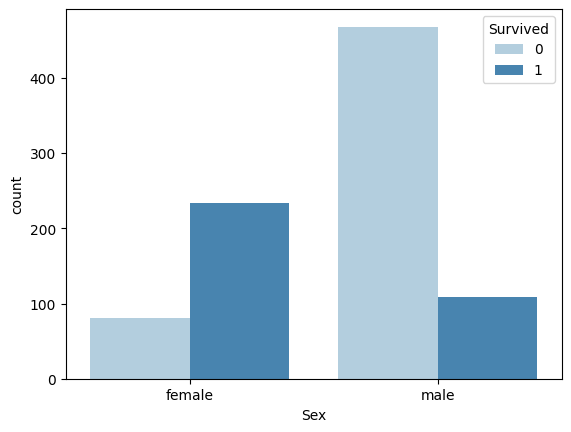

In [24]:
sns.countplot(data=train, x='Sex', hue='Survived', palette='Blues')

### Tạo vòng lặp để vẽ biểu đồ tương quan giữa các cột: `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` với `Survived`


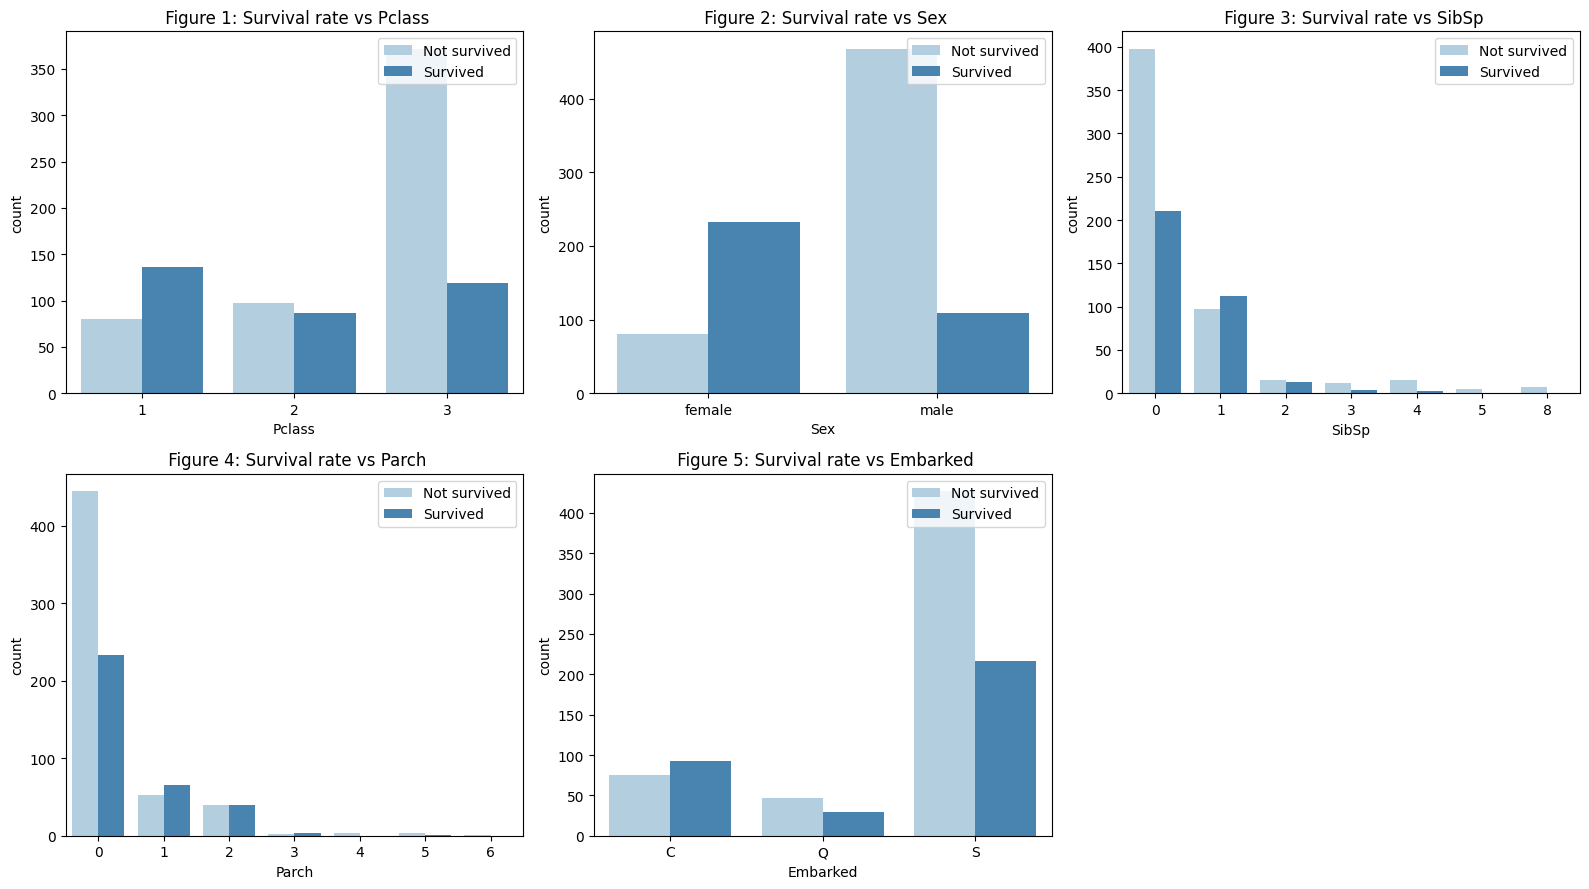

In [25]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_rows*8, n_cols*3))
for r in range(0, n_rows): #range(vị trí số hàng bắt đầu, vị trí hàng)
  for c in range(0, n_cols): #range(vị trí số cột bắt đầu, vị trí cột)
      i = r*n_cols + c #18:59 giải thích dòng này
      if i < len(cols):
        ax_i = ax[r,c]
        sns.countplot(data=train, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
        ax_i.set_title(f" Figure {i+1}: Survival rate vs {cols[i]}")
        ax_i.legend(title='', loc='upper right', labels=['Not survived', 'Survived'])

ax.flat[-1].set_visible(False) #remove the last subplot
plt.tight_layout()

### Observation:

### Survival Rate:

Fig 1: Female survival rate > male

Fig 2: Most People embarked on Southampton, and also had the highest people not survived

Fig 3: 1st class higher survival rate

Fig 4: People going with 0 SibSp are mostly not survived. The number of passengers with 1-2 family members has a better chance of survival

Fig 5: People going with 0 Parch are mostly not survived

# 3.1. EDA Numerical
### `Age`

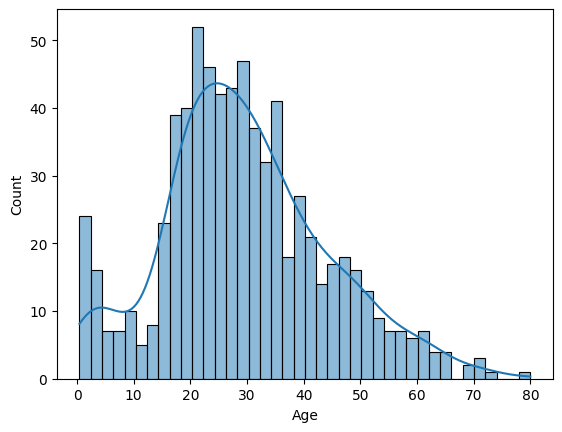

In [26]:
sns.histplot(data=train, x='Age', bins = 40, kde=True);
#bins: khoảng cách của các cột, để hiểu rõ hơn có thể vẽ thêm nhiều biểu đồ khác nhau và thay thế các số bins khác nhau

<Axes: xlabel='Age', ylabel='Count'>

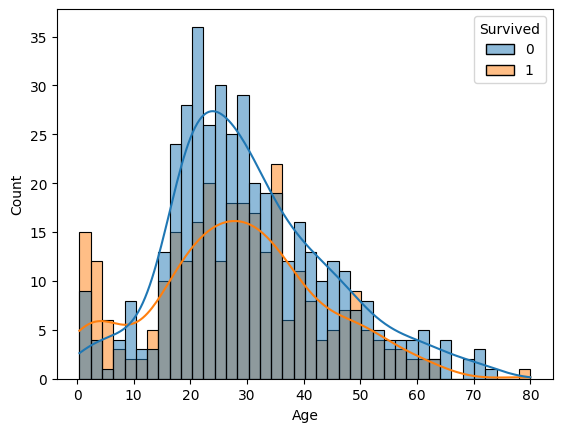

In [27]:
#vẽ biểu đồ hiển thị người sống sót với độ tuổi
sns.histplot(data=train, x='Age', hue='Survived', bins = 40, kde=True)

- Majority passengers were from 18-40 ages
- Children had more chance to survive than other ages
### `Fare`

In [28]:
train['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


- mean: giá vé trung bình ~ 32 đô
- std: gía vé có độ lệch tương đối lớn so với min có giá vé 0 đô la(có thể những vị khách là thuyền trưởng,...)
- 25%: khoảng 25% giá vé rơi vào ~ 7.9 đô
- 50%: giá vé rơi vào ~ 14 đô
- 75%: giá vé rơi vào ~ 31 đô
- max: giá vé mắc nhất rơi vào ~512 đô

<Axes: xlabel='Fare', ylabel='Count'>

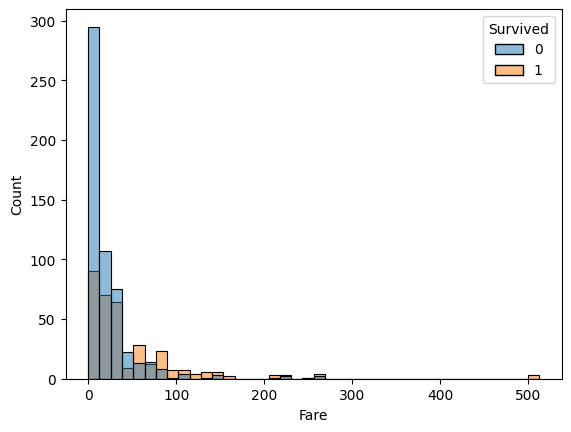

In [29]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=40)

##### Những người trả tiền vé thấp thường có tỉ lệ sống ít hơn các giá vé hạng cao cấp.
### -> Chia nhỏ các khoảng phần trăm giá vé để xem tỉ lệ sống sót có khả năng chính xác nhất (0-25, 25-50, 50-75, 75-100) - 4 khoảng

36:13 giải thích về hàm qcut

In [30]:
pd.qcut(train['Fare'], 4)

,Fare
PassengerId,
1,"(-0.001, 7.91]"
2,"(31.0, 512.329]"
3,"(7.91, 14.454]"
4,"(31.0, 512.329]"
5,"(7.91, 14.454]"
...,...
887,"(7.91, 14.454]"
888,"(14.454, 31.0]"
889,"(14.454, 31.0]"


### Đọc dữ liệu
- Khách1 : nằm trong khoảng (-0.001, 7.91]
- Khách2: nằm trong khoảng (31.0, 512.329]
- Khách3: nằm trong khoảng	(7.91, 14.454]
- Khách4: nằm trong khoảng	(31.0, 512.329]
- Khách5: nằm trong khoảng	(7.91, 14.454]
- Khách891: ...

### -> Categories ở đây chia các dữ liệu thành 4 khoảng giá vé (0-25%, 25-50%, 50-75%, 75-100%)

In [31]:
train['Fare']

,Fare
PassengerId,
1,7.2500
2,71.2833
3,7.9250
4,53.1000
5,8.0500
...,...
887,13.0000
888,30.0000
889,23.4500


### Đọc dữ liệu
- Khách1 : giá vé khoảng 7.91
- Khách2: giá vé khoảng 71.2833
- Khách3: giá vé khoảng 7.9250
- Khách4: giá vé khoảng 53.1000
- Khách5: giá vé khoảng 8.0500
- Khách 891: .....

## Đặt tên cho 4 khoảng giá vé:

<Axes: xlabel='Fare', ylabel='count'>

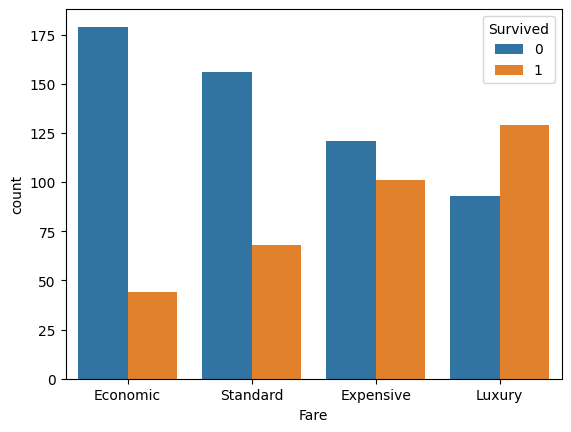

In [32]:
name_fare = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train['Fare'], 4, labels = name_fare)

sns.countplot(x=quartile_data, hue=train['Survived'])

### Distribution of Fare
- Fare does not follow a normal distribution and has a huge spike at the price range [0-100$].

- The distribution is skewed to the left with 75% of the fare paid under 31 and a max paid fare of $512.

### Quartile plot:
• Passenger with Luxury & Expensive Fare will have more chance to survive

# 4. Furture Engineering -  Data wrangling
## 4.1. Furture Engineering
#### Future engineering: chuyển đổi tập dữ liệu thô ban đầu, chuyển sang một cột đặc trưng mới, mô tả dữ liệu tốt hơn
#### Data wrangling: sắp xếp dữ liệu, tiền xử lý dữ liệu, làm sạch dữ liệu
#### Future engineering: transform the original raw dataset, convert to a new feature column, describe the data better
#### Data wrangling: data wrangling, data preprocessing, data cleaning


### `Name`
5:07 explain the extract title

Check the data column and you can see that the titels are also recorded in the name column, separate the titels and compare whether the people with the positions recorded with the names have a higher survival rate than normal people?
kiểm tra cột dữ liệu có thể thấy các titel cũng được ghi trong cột name, tách các titel và so sánh xem những người có chức vụ đc ghi kèm với tên có số lượng sống sót cao hơn người bình thường hay ko?


In [33]:
train['Name']

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
...,...
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""


### -> Use `regular expression` to split words ⬇

In [34]:
import re
def extract_title(name):
  p = re.compile(r",([\w\s)]+)\.")
  # if p.search(name) is None:
  #     print(name)
  return p.search(name).groups(1)[0].strip()

In [35]:
train['title'] = train['Name'].apply(lambda name: extract_title(name))
#áp dụng hàm lambda như 1 hàm ẩn danh mà ko cần đặt tên biến đó,
#lambda apply có thể giúp cho dòng code p = re.compile(r",(.+)\.") ở trên hoạt động dựa trên cột 'Name'

In [36]:
train['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [37]:
# #check the full name that did not match with the regex code
# train[train['Name'].str.contains('Mrs. Martin')]['Name']

### -> Changing the regex code to get the title ⬆

In [38]:
#check again with test
test['title'] = test['Name'].apply(lambda name:extract_title(name))

In [39]:
test['title'].value_counts()

,count
title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


### Check 18:48 (Part3): guiding how to group others title

In [40]:
def group_title(title):
  if title in ['Mr', 'Miss', 'Mrs', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'

train['title'] = train['title'].apply(lambda title: group_title(title))
test['title'] = test['title'].apply(lambda title: group_title(title))

In [41]:
train['title'].value_counts()

,count
title,
Mr,517
Miss,183
Mrs,125
Master,40
Others,26


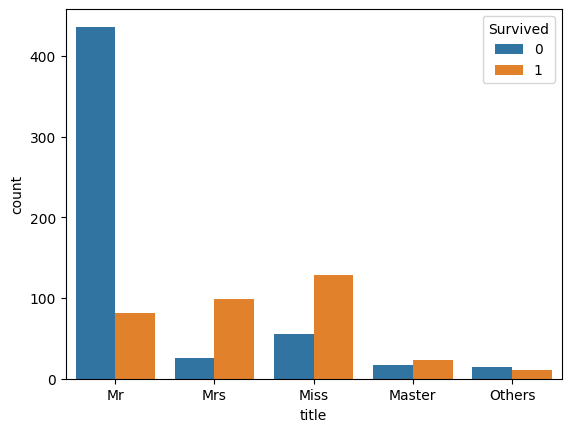

In [42]:
sns.countplot(data=train, x='title', hue='Survived');

# Family
#### Combine `Sibsp` and `Parch`


In [43]:
train['family_size'] = train['SibSp'].astype('int') + train['Parch'].astype('int') + 1

In [44]:
test['family_size'] = test['SibSp'].astype('int') + test['Parch'].astype('int') + 1

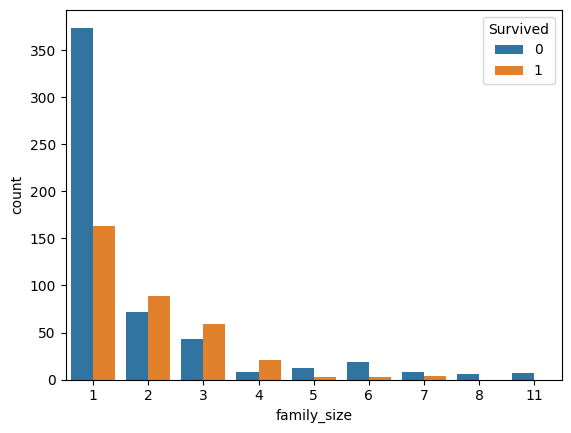

In [45]:
sns.countplot(data=train, x='family_size', hue='Survived');

#### Use pdcut to cut them: solo, small, medium, large ⬇

In [46]:
train['family_cat'] = pd.cut(train['family_size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test['family_cat'] = pd.cut(test['family_size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])

bins=[0,1,4,6,20]:

Đây là danh sách các giá trị xác định các khoảng (bins) mà bạn muốn phân loại. Các giá trị trong bins xác định các ranh giới giữa các nhóm.

Trong trường hợp này:

`0-1`: Bao gồm các giá trị từ 0 đến 1 (không bao gồm 1).

`1-4`: Bao gồm các giá trị từ 1 đến 4 (không bao gồm 4).

`4-6`: Bao gồm các giá trị từ 4 đến 6 (không bao gồm 6).

`6-20`: Bao gồm các giá trị từ 6 đến 20.

`labels`=['Solo', 'Small', 'Medium', 'Large']:

Đây là danh sách các nhãn mà bạn gán cho từng khoảng (bin) tương ứng. Các nhãn này sẽ được sử dụng để mô tả kích thước gia đình dựa trên giá trị của family_size.

Trong trường hợp này:

`Solo`: Được gán cho những gia đình có kích thước từ 0 đến 1.

`Small`: Được gán cho những gia đình có kích thước từ 1 đến 4.

`Medium`: Được gán cho những gia đình có kích thước từ 4 đến 6.

`Large`: Được gán cho những gia đình có kích thước từ 6 đến 20.

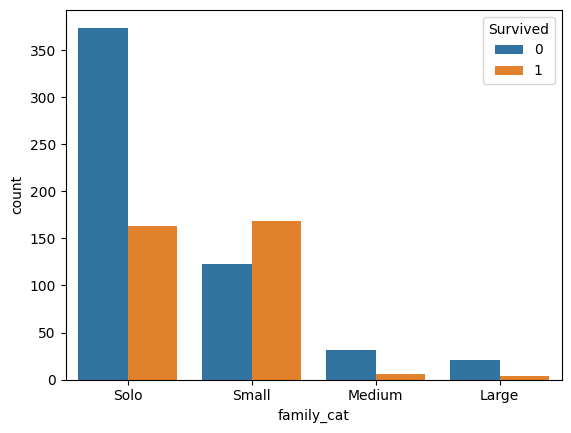

In [47]:
sns.countplot(data=train, x='family_cat', hue='Survived');

####-> Có thể nhìn thấy các gia đình có số lượng `Small` có tỉ lệ sống sót cao hơn các gia đình khác.
####-> Tỉ lệ sống sót của gia đinh ít người `Solo` rất thấp

## 4.2 Data Wrangling

In [48]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'title', 'family_cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'title', 'family_cat']


In [49]:
#check missing value in feature_cols - check 31:50(part3)
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count >0:
      # print(f" {col} has {missing_count} missing values.")
      print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train, feature_cols)
display_missing(test, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing values 35:40 (part3)
#### Age
- filling missing values with `median` of whole dataset
với gần 20% dữ liệu bị mất nhưng lại lựa chọn dữ liệu trung bình thay thế vào thì cũng chưa khả quan vì mỗi khách nam và nữ có những độ tuổi trung bình khác nhau -> sẽ groupby lại cá nhóm nữ và nam theo ghế hạng và độ tuổi để tìm số liệu trung bình thay thế vào dữ liệu mất.

In [50]:
age_by_sex_pclass = train.groupby(['Sex', 'Pclass'])['Age'].median()

In [51]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

### kết quả cho thấy giới tính nam và nữ có 3 hạng khoang ghế với các độ tuổi trung bình, ở nữ độ tuổi trung bình hạng `firstclass` là ~ 35t và nam `firstclass` là ~ 40t.

In [52]:
# Filling missing values in `Age` with the median of Sex and Pclass group
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())) #can't use 'apply' cause got index error
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())) #can't use 'apply' cause got index error

In [53]:
#check missing again
display_missing(train, feature_cols)
display_missing(test, feature_cols)
# -> filling Age missing values completed, others missing can use simple method

Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [54]:
#split train 41:00 (part3)
X = train[feature_cols]
y = train['Survived']

In [55]:
X_test = test[feature_cols]

In [56]:
#43:00 (part 3)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')), #category ko thể dùng median đc vì đó dùng cho dữ liệu số
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

### Tóm tắt:
- num_transformer là một Pipeline được thiết kế để xử lý các biến số bằng cách thay thế giá trị thiếu bằng giá trị trung vị và chuẩn hóa dữ liệu.

- cat_transformer là một Pipeline được thiết kế để xử lý các biến phân loại bằng cách thay thế giá trị thiếu bằng giá trị phổ biến nhất và mã hóa dữ liệu phân loại thành dạng nhị phân.

In [57]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [58]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'title',
                                  'family_cat'])])

In [59]:
X = preprocessor.transform(X)

In [60]:
X_test = preprocessor.transform(X_test)

# 5. Model training

In [61]:
#4:17 (part 4)
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
#val = validation

In [63]:
#check X_train and X_val
X_train.shape, X_val.shape

((712, 19), (179, 19))

#### -> có thể thấy được tập train nhiều dòng data hơn vì cần nhiều dữ liệu để huấn luyện mô hình máy học

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [65]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [66]:
log_reg.score(X_val, y_val)

0.8044692737430168

In [67]:
y_pred = log_reg.predict(X_val)

In [68]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8421052631578947, 0.6486486486486487)

In [69]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [70]:
poly = PolynomialFeatures(degree=5)
poly_feature_X_train = poly.fit_transform(X_train)
poly_feature_X_val = poly.transform(X_val)

In [71]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_feature_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [72]:
poly_log_reg.score(poly_feature_X_val, y_val)

0.770949720670391

In [73]:
#18:55 (part4)
#Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [74]:
decision_tree.score(X_val, y_val)

0.8156424581005587

## 5.1 Cross-Validation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2023)

lr_score = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [77]:
lr_score

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [78]:
lr_score.mean(), lr_score.std()

(0.826031008725127, 0.020466357172416235)

In [81]:
dt_score = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [82]:
dt_score.mean(), dt_score.std()

(0.8069801016885318, 0.014586754299604428)

## 5.2 Baseline Model Comparison

In [79]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install XGBOOST
seed=2023
models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [83]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_result (models, X, y, metrics, cv=5, plot_result=False):
  kfold = StratifiedKFold(cv, shuffle=True,random_state=seed)
  entries=[]
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
    for fold_idx, score in enumerate(scores):
      entries.append((model_name,fold_idx, score))

  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

  if plot_result:
    sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
    plt.title('Boxplot of Baseline Model Accuracy using 5-fold cross-validation')
    plt.xticks(rotation=45)
    plt.show()

  mean = cv_df.groupby('model_name')['accuracy_score'].mean()
  std = cv_df.groupby('model_name')['accuracy_score'].std()

  baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
  baseline_result.columns = ['Mean', 'Standard Deviation']

  baseline_result.sort_values(by=['Mean'], ascending=False, inplace=True)

  return baseline_result

generate_baseline_result(models, X, y, metrics='accuracy', cv=5, plot_result=False)

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
XGBClassifier,0.831624,0.015685
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.803559,0.023451
DecisionTreeClassifier,0.794608,0.016252
